<a href="https://colab.research.google.com/github/Vanajareddy01/weather-temperature-prediction/blob/main/Weather_Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data:
     humidity     pressure  wind_speed  prev_temp  temperature
0  52.472407  1012.471108    2.443734  22.534026  -152.577422
1  87.042858   992.944899   13.635741  24.178855  -124.356310
2  73.919637   995.657005    8.073533  22.655157  -132.749899
3  65.919509  1021.449397   12.570405  21.330538  -139.771056
4  39.361118  1011.225017    5.480694  21.809538  -150.151432

Linear Regression Results:
MAE: 1.47, RMSE: 1.81, R²: 0.97

Decision Tree Results:
MAE: 4.20, RMSE: 5.45, R²: 0.75

Random Forest Results:
MAE: 2.38, RMSE: 3.30, R²: 0.91


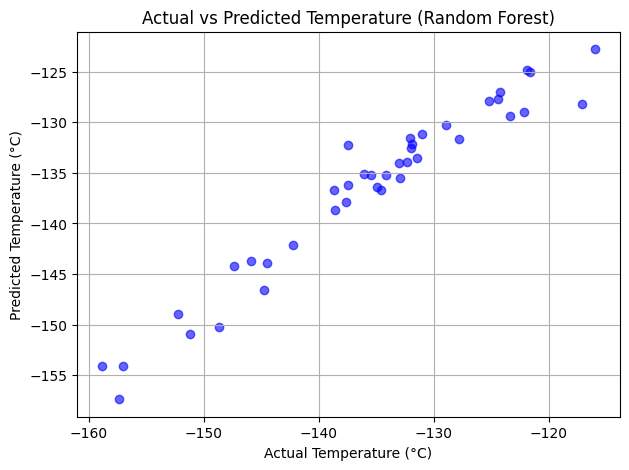


Model Performance Summary:
                        MAE      RMSE        R²
Linear Regression  1.474594  1.813759  0.971780
Decision Tree      4.198724  5.450713  0.745140
Random Forest      2.381671  3.301556  0.906496


In [2]:
# Weather Temperature Prediction using Machine Learning
# Author: Vanaja Malreddy

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ---------------------------
# 1. Simulate or Load Dataset
# ---------------------------

# For demo: create a small synthetic dataset (you can replace this with your Kaggle dataset)
np.random.seed(42)
data_size = 200
data = {
    "humidity": np.random.uniform(30, 90, data_size),
    "pressure": np.random.uniform(990, 1025, data_size),
    "wind_speed": np.random.uniform(1, 15, data_size),
    "prev_temp": np.random.uniform(20, 35, data_size)
}
df = pd.DataFrame(data)
df["temperature"] = (
    0.3 * df["humidity"]
    - 0.2 * df["pressure"]
    + 0.8 * df["wind_speed"]
    + 1.5 * df["prev_temp"]
    + np.random.normal(0, 2, data_size)
)

print("Sample data:\n", df.head())

# ---------------------------
# 2. Train-Test Split
# ---------------------------
X = df[["humidity", "pressure", "wind_speed", "prev_temp"]]
y = df["temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3. Train Models
# ---------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = [mae, rmse, r2]
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# ---------------------------
# 4. Visualization
# ---------------------------
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature (Random Forest)")
plt.grid(True)
plt.show()

# ---------------------------
# 5. Summary Table
# ---------------------------
result_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T
print("\nModel Performance Summary:")
print(result_df)
